### object detection and count

In [1]:
import cv2

In [2]:
path = "C:/Users/USER/Desktop/road_obj/road_traffic_cut.mp4"

In [3]:
def frame_capture(path):
    cap = cv2.VideoCapture(path)
    count = 0
    success = 1
    while success :
        success,img = cap.read()
        cv2.imwrite("frame%d.jpg" %count,img)
        count+=1

In [5]:
#frame_capture(path)

In [3]:
import os
import re
import numpy as np
from os.path import isfile,join
import matplotlib.pyplot as plt

In [4]:
col_frames = os.listdir("C:/Users/USER/Desktop/road_obj/video_obj_frames/")

In [31]:
#col_frames

In [5]:
col_imgs  = []

In [6]:
for i in col_frames:
    img = cv2.imread("C:/Users/USER/Desktop/road_obj/video_obj_frames/"+i)
    col_imgs.append(img)

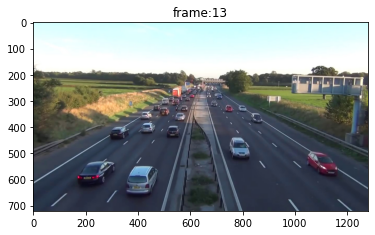

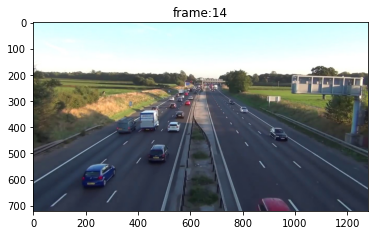

In [7]:
i=13
for frame in [i,i+1]:
    plt.imshow(cv2.cvtColor(col_imgs[frame],cv2.COLOR_BGR2RGB))
    plt.title("frame:"+str(frame))
    plt.show()

In [ ]:
#convert from bgr to gray

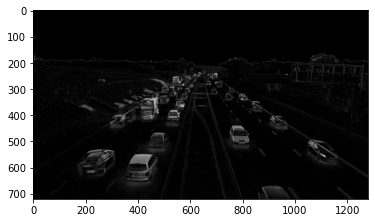

In [8]:
gray_A = cv2.cvtColor(col_imgs[i],cv2.COLOR_BGR2GRAY)
gray_B = cv2.cvtColor(col_imgs[i+1],cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.absdiff(gray_B,gray_A),cmap='gray')
plt.show()

In [ ]:
#take the difference btw 2 consective frames

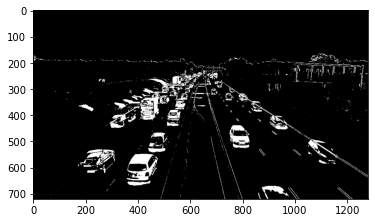

In [9]:
diff_img = cv2.absdiff(gray_B,gray_A)
ret,thresh = cv2.threshold(diff_img,30,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.show()

In [ ]:
#dilate an image

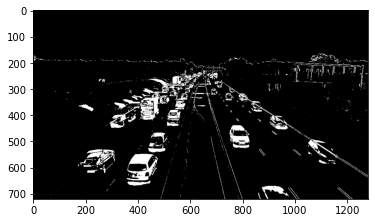

In [10]:
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations=0)
plt.imshow(dilated,cmap='gray')
plt.show()

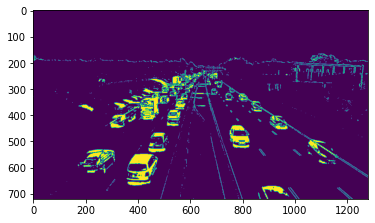

In [11]:
plt.imshow(dilated)
cv2.line(dilated,(0,80),(256,80),(100,0,0))
plt.show()

In [ ]:
#find the contours

In [15]:
contours,hier = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [ ]:
#find number of contours

In [75]:
valid_cnts = []
for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x<=1230) & (y>=400) & (cv2.contourArea(cntr)>=35):
        valid_cnts.append(cntr)
len(valid_cnts)

52

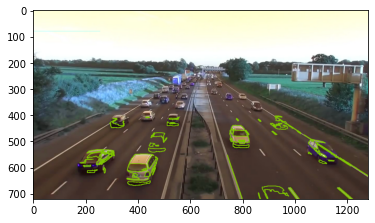

In [87]:
dmy = col_imgs[13].copy()
cv2.drawContours(dmy,valid_cnts,-1,(127,200,0),2)
cv2.line(dmy,(0,80),(256,80),(100,255,255))
plt.imshow(dmy)
plt.show()

# vehicle detection for video

In [88]:
kernel = np.ones((4,4),np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
pathin = 'C:/Users/USER/Desktop/road_obj/vehicle_contours/'
for i in range(len(col_imgs)-1):
    #gray for two consecutive images
    grayA = cv2.cvtColor(col_imgs[i],cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_imgs[i+1],cv2.COLOR_BGR2GRAY)
    #take the difference between two images
    diff_img = cv2.absdiff(grayB,grayA)
    #apply the threshold
    rt,thr = cv2.threshold(diff_img,30,255,cv2.THRESH_BINARY)
    #dilate an image 
    dil = cv2.dilate(thr,kernel,iterations=0)
    #find the contour
    cont,hir = cv2.findContours(thr.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #append the valid contours
    valid_contours = []
    for contr in cont:
        x,y,w,h = cv2.boundingRect(contr)
        if (x<=1250) & (y>=500) & (cv2.contourArea(contr)>=25):
            valid_contours.append(contr)
    dmy = col_imgs[i].copy()
    cv2.drawContours(dmy,valid_contours,-1,(127,200,0),2)
    cv2.putText(dmy,"vehicles detected:"+str(len(valid_contours)),(55,15),font,0.6,(0,180,0),2)
    cv2.rectangle(dmy,(0,80),(256,80),(100,255,255))
    cv2.imwrite(pathin+str(i)+'.jpg',dmy)

In [ ]:
#create a path

In [89]:
pathout = 'vehicle_detection.mp4'
fps = 14

In [90]:
frame_arry = []
files = [f for f in os.listdir(pathin) if isfile(join(pathin,f))]

In [ ]:
#read the frames and append it to a list for further use

In [91]:
for i in range(len(files)):
    filename = pathin+files[i]
    
    img = cv2.imread(filename)
    h,w,l = img.shape
    size = (w,h)
    frame_arry.append(img)

In [ ]:
#convert frames into a video

In [92]:
out = cv2.VideoWriter(pathout,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
for i in range(len(frame_arry)):
    out.write(frame_arry[i])
out.release()